![Iscte Logo](https://www.iscte-iul.pt/assets/images/logo_iscte_detailed.svg)

# Exploração do TAD Lista com implementação de listas ligadas
*Análise da complexidade de algoritmos*
---
**Relatório elaborado no âmbito da Unidade Curricular de Estruturas de Dados e Algoritmos do 1º ano da Licenciatura de Ciência de Dados**

Realizado por:
* 105208 - Afonso Silva - Turma CDA2
* 105289 - André Plancha - Turma CDA2
* 105220 - Tomás Ribeiro - Turma CDA2
* 105301 - Vasco Guerreiro - Turma CDA2

Veja este notebook com o [nbViewer](https://nbviewer.org/github/notPlancha/Trabalho-de-Prog-2/blob/main/Fase%202.ipynb). O código total está em anexo.

# Introdução
Uma lista ligada é uma estrutura de dados que armazena elementos numa ordem específica.
Foi implementado uma lista duplamente ligada que consiste numa lista ligada em que os elementos estão ligados de forma reciproca, ou seja, um elemento está ligado ao seguinte e o mesmo está ligado ao anterior.
E foi também implementado uma lista ligada circular onde a cabeça está ligada à cauda. Até agora, de modo geral foram realizados alguns métodos sobre as implementações que permitem a gestão da mesma e implementamos também algoritmos de pesquisa binária, sequencial e os métodos de ordenação bubblesort e mergesort que vamos seguidamente fazer uma análise espaciotemporal.
O objetivo é tentar analisar a eficiência que cada algoritmo tem sobre como varia a sua ocupação no espaço bem como no tempo para assim poder perceber quanto tempo demora e quanto espaço ocupa a execução da pesquisa binária, o mergesort e bubblesort.
Para esse efeito iremos fazer testes ao desempenho dos algoritmos, representar graficamente as funções espaço e tempo, e descrever as observações retiradas desses mesmos gráficos. Utilizaremos este processo quer para lista ligada circular e a lista duplamente ligada.
Ao longo desta análise iremos formular hipóteses as quais iremos também comparar com os resultados empíricos obtidos.


In [1]:
# Imports TODO remove not needed

from doubly_linked_list import DoublyLinkedList
from circular_linked_list import CircularLinkedList
from base_classes import LinkedList
from Testes_ao_codigo import fromListToDll, fromListToCll
from typing import List, Tuple
from timeit import Timer
from numpy import random
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm
from random import randint, seed, getrandbits

FileSeed = 10
maxNLists = 300
nlistsForN = 25

# Metodologia
Para analisarmos a complexidade temporal empiricamente, vamos usar a biblioteca <code>timeit</code>, em conjunto com a biblioteca <code>numpy</code>, para construir as nossas listas ligadas. Iremos usar uma seed pré-definida de forma aos nossos testes. No fim, iremos usar <code>matplotlib</code> para analisar os tempos dos vários algoritmos graficamente. Para a nossa análise assintótica, iremos demonstrar as conclusões tiradas, baseadas em como construimos o nosso algoritmo.

In [2]:
def randomLists(seed, nMax , eachNNLists):
    random.seed(seed)
    return [[random.randint(0, 10000, i) for _ in range(eachNNLists)] for i in range(nMax+1)]

def plotIt(title, xPoints, yPoints, axis = None):
    if axis is None:
        axis = plt
        plt.title(title)
    else:
        axis.set_title(title)
    axis.scatter(xPoints, yPoints)
    axis.xlabel('N')
    axis.ylabel('Tempo (s)')
def plotMethodTime(title, method):
    testArrays = randomLists(FileSeed, maxNLists, nlistsForN)
    X = []
    Y = []
    for i in tqdm(range(len(testArrays))):
        for j in testArrays[i]:
            X.append(len(j))
            LL = fromListToDll(j)
            Y.append(Timer(lambda: method(LL)).timeit(number=5))
    
    plotIt(title, X, Y)
    return X, Y

# Mergesort
O mergesort é um algoritmo de ordenação que divide um vetor em dois subvetores e ordena cada um deles de forma recursiva, juntando-os de forma ordenada. A complexidade temporal do mergesort quando usado num vetor é de O(n log n), onde n é o número de elementos do vetor. Isto é porque divide o vetor em duas metades e demora um tempo linear para fundir os vetores.
Numa lista ligada, a nossa hipótese é que este algoritmo não sofre alterações na sua complexidade temporal, sendo que este algoritmo não parece ter vantagens temporais ao ter um vetor em vês desta estrutura de dados. Consoante o nosso código, mostrado e explicado de seguida, este parece ser o caso, em qualquer uma das listas implementadas, sendo que a lista ser circular ou duplamente ligada não dá nenhuma vantagem, ou desvantagem em termos de eficiência temporal.
Em termos de eficiência espacial, este algoritmo tem a possibilidade de não precisar de O(n) de complexidade espacial, como demonstrado por [Tatham (2017)](https://www.chiark.greenend.org.uk/~sgtatham/algorithms/listsort.html). Na nossa análise, iremos verificar se conseguimos alcançar essa conquista.

## Implementação
De seguida está demonstrado como este algoritmo foi implementado. Da forma como está implementada, achou-se desnecessário analisar as diferenças entre a lista duplamente ligada e lista circular, sendo que não há difernças na impleentação do algorítmo.

In [3]:
def mergeSort(self, isCircular=False):
    if isCircular:
        self.tail.next = None
    if self.size <= 1:
        return
    mid = self.findMiddle()
    a = type(self)()
    a.head = self.head
    a.tail = mid[0]
    a.size = mid[1] + 1
    b = type(self)()
    b.head = mid[0].next
    b.tail = self.tail
    b.size = self.size - mid[1] - 1

    a.mergeSort()
    b.mergeSort()

    result = type(self).sortedMerge(a, b)
    self.head = result[0]
    self.tail = result[1]
    self.size = result[2]
    if isCircular:
        self.tail.next = self.head

O mergeSort implementado começa por encontrar o centro da nossa Lista Ligada. Este processo vai percorrer a nossa lista (começando na cabeça) até chegar a <code>self.size//2</code>, ou seja, a metade do tamanho da lista, dando aí o elemento do centro, ou o primeiro se o tamanho for ímpar. De forma a separar a lista em duas partes iguais, o algoritmo cria duas outras listas ligadas, <code>a</code> e <code>b</code>, com o elemento do centro sendo a cauda de <code>a</code> e o próximo desse a cabeça de <code>b</code>. Aqui, este vai ordenar estas duas listas, chamando mergeSort para estes também para estes ordenarem de forma recursiva. Ao estes virem ordenados, a e b vão fundir-se numa nova lista ligada, de forma ordenada tornando esta nova na lista final. Para tal, é implementado sortedMerge. Este vai adicionando a uma nova cabeça os elementos de cada uma das listas fornecidas de forma sequencial e ordenada.

## Complexidade espacial
Este algoritmo vai ter uma complexidade espacial de O(log n), sendo que estamos a criar novas listas cada vez que entramos na recursividade, estas correndo 2 * log n vezes. Sendo que estas listas ligam diretamente ao nó com o valor, em vez de criá-lo novamente, apenas <code>LinkedList.size</code> vai aumentar a memória.

## Complexidade temporal
De seguida irá ser criado os dados sobre o tempo de execução do algoritmo, e analisado.

  0%|          | 0/301 [00:00<?, ?it/s]

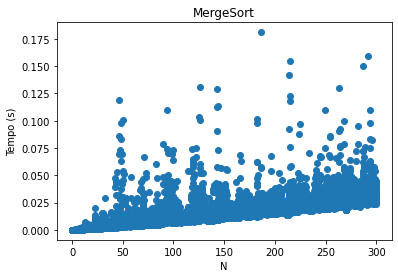

In [4]:
XMerge, YMerge = plotMethodTime('MergeSort', DoublyLinkedList.mergeSort)

Através da análise do gráfico podemos confirmar a hipótese formulada previamente onde foi referido que a complexidade temporal do mergesort iria ser representada por O(n*log(n)) visto que o gráfico descreve o mesmo desenho que esta expressão representa.

# Bubblesort
O bubblesort é um algoritmo de ordenação que consiste em ordenar o vetor por seções ordenando em primeiro lugar o par constituido pelo primeiro e segundo elemento, de seguida ordenando o segundo e o terceiro até ao fim da lista. Se a este ponto o vetor ainda nao estiver ordenado repete-se o processo.
No prior caso a complexidade temporal do bubblesort é O(n^^2) onde n é o numero de elementos do vetor, isto acontece porque a lista percorre-se de forma sequncial várias vezes. Á semelhança do mergesort este não vai ter alterações a nivel temporal no quando comparamos um vetor e uma lista ligada.
 Á semelhança do merge sort mais uma vez nem sempre a complexidade espacial será um como demonstraremos se tivermos tempo.
 Na nossa implementação começamos por indicar se a lista está ordenada. Aplicamos um ciclo que percorre a os elementos que não são None compara-os e troca-os se ainda nao estiverem por ordem. Ao repetir esse ciclo um determinado número de vezes a lista ficará ordenada.

## Implementação


De seguida está demonstrado como este algoritmo foi implementado. Não existem diferenças em relação a uma lista simplesmente ligada.

In [5]:
def bubbleSort(self):
    if self.size <= 1:
        return
    is_sorted = False
    while not is_sorted:
        is_sorted = True
        current_node = self.head
        while current_node.next is not None and current_node is not self.tail:
            if current_node.value > current_node.next.value:
                LinkedNode.swap(current_node, current_node.next)
                is_sorted = False
            current_node = current_node.next

## Complexidade espacial

Como temos três variáveis na implementação a complexidade espacial é O(3). 

## Complexidade temporal
De seguida irá ser criado os dados sobre o tempo de execução do algoritmo, e analisado.

  0%|          | 0/301 [00:00<?, ?it/s]

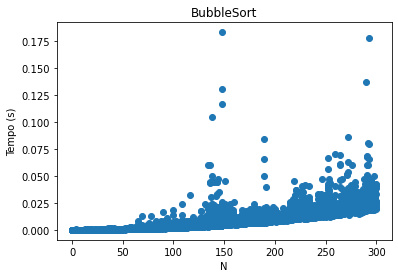

In [6]:
XBubble, YBubble = plotMethodTime('BubbleSort', DoublyLinkedList.bubbleSort)

Como podemos verificar no gráfico, confirmamos a nossa hipótese em que referimos que a complexidade temporal do bubblesort é O(n^^2) onde n é o numero de elementos do vetor, já que o desenho que o gráfico desenha sugere uma parábola.

# Comparação de algoritmos de ordenação

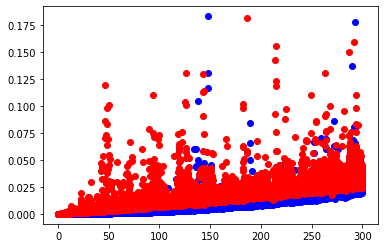

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(XBubble, YBubble, c="b")
ax1.scatter(XMerge, YMerge, c="r")
plt.show()

Ao analisar as funções é nos dada a ideia de que o mergesort demora mais tempo do que o bubble sort, contudo se aumentarmos circunstancialmente o numero de elementos do array verificamos que existira uma maior demora na execução do bubble sort pois nesta função o crescimento é superior ao do mergesort

# Binary Search
O algoritmo de pesquisa binária é um algoritmo que pretende verificar se existe determinado elemento no vetor. Parte-se do pressuposto que o vetor esta ordenado. Consiste em analisar o elemento do meio e verificar se corresponde ao elemento procurado, se não for o algoritmo vai comparar se o numero procurado é maior ou menor do que o elemento e vai criar um novo meio entre o meio anterior e o ultimo elemento ou o primeiro consoante o resultado da comparação. O processo repete-se até encontrar o elemento ou nocaso de nao encontrar até não haver mais elementos no vetor. A complexidade temporal é O(nlog(n)), se seguirmos uma lista ligada sequencial o tempo para encontrar o meio é O(n), então no conjunto de tudo fica O(nlog(n)).
Se compararmos a implementação deste algoritmo verificamos que a a complexidade temporal aumenta passando de O(log(n)) para O(nlog(n)).
Numa lista ligada o nosso algoritmo tem três variaveis e por isso corresponde a uma complexidade de O(3) que corresponde a O(1).
Na nossa implementação começamos por ordenar a lista. De seguida identificamos o inicio e o fim da lista. Aplicamos um ciclo em que vamos descobrindo o meio da lista através de um método implementado e comparamos com o valor do parametro. Se for igual vai retornar o indice do mesmo, se for o parametro for maior ou menor vai atualizar meio para corresponder aos requisitos.

## Implementação
De seguida está demonstrado como este algoritmo foi implementado. Não existem diferenças em relação a uma lista simplesmente ligada.

In [9]:
def binarySearch(self, item, order=True):
    if self.size == 0:
        return None, -1
    if order:
        self.ordenar()
    start = (self.head, 0)
    end = (self.tail, self.size - 1)
    while end[0] != start[0] or end[0] is None or start[0] is None:  # not sure of this line
        mid = self.findMiddle(start, end)
        if mid[0].value == item:
            return mid
        elif mid[0].value < item:
            start = (mid[0].next, mid[1] + 1)
        else:
            end = mid
    if start[0] == item:
        return start
    else:
        return None, -1

## Complexidade espacial

Numa lista ligada o nosso algoritmo tem três variáveis e por isso corresponde a uma complexidade de O(3) que corresponde a O(1).

## Complexidade temporal

De seguida irá ser criado os dados sobre o tempo de execução do algoritmo, e analisado. Como este algortimo precisa de ordenação prévia e de passar um argumento, obriga a ter algumas mudanças na função

In [ ]:
testArrays = randomLists(FileSeed, maxNLists, nlistsForN)
X = []
Y = []
for i in tqdm(range(len(testArrays))):
    for j in testArrays[i]:
        X.append(len(j))
        if bool(getrandbits(1)) and len(j) > 1:
            search = j[randint(0, len(j) - 1)]
        else:
            search = 50 # so it has a chance to fail
        LL = fromListToDll(j)
        LL.ordenar()
        Y.append(Timer(lambda: LL.binarySearch(search)).timeit(number=5))
plotIt("Binary Search", X, Y)

  0%|          | 0/301 [00:00<?, ?it/s]

# Conclusão


Ao concluir este trabalho conseguimos avaliar quer no espaço quer no tempo o comportamento dos vários algoritmos e perceber que o aloritmo a usar pode variar de acordo com o numero de elementos do array já que as funções comportam-se de maneira diferente.

# Distribuição do trabalho
Durante a realização do trabalho não atribuimos responsabilidades a cada elemento porque consideramos que poderiamos ter um trabalho mais rico se todos dessem o seu contributo em cada parte, assim definimos que todo o grupo é responsavel por todo o trabalho.